**Исследование цен подержанных автомобилей**

Имеется набор данных цен подержанных автомобилей в Египте.

Данные имеют следующие признаки:

*   Model - модель автомобиля
*   Year - год выпуска
*   Km/h - пробег
*   Color - цвет автомобиля
*   Type - тип коробки передач (механика или автомат)
*   Fuel - тип топлива (бензин, дизель, электричество, гибрид)
*   Price - цена автомобиля

Работа буедт проводиться в среде разработки Python с использованием библиотек: NumPy, Pandas, Matplotlib, Seaborn и Sklearn.

In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Задание 1

Для начала загрузим данные в датафрейм и выведем несколько строк, чтобы убедиться, что данные загрузились корректно.

In [178]:
cars = pd.read_csv("drive/MyDrive/cars.csv")
cars.head(5)

,Model,Year,Km/h,Color,Type,Fuel,Price
0,Hyundai Elantra HD,2009.0,"165,000",Gray,Automatic,Gasoline,"560,000"
1,Hyundai Elantra,2010.0,"194,000",Black,Automatic,Gasoline,"600,000"
2,Hyundai Elantra HD,2010.0,"205,000",Silver,Automatic,Gasoline,"575,000"
3,Hyundai Elantra,2010.0,"160,000",Black,Automatic,Gasoline,"550,000"
4,Hyundai Elantra,2009.0,"140,451",Eggplant,Automatic,Gasoline,"650,000"


Задание 2

Посмотрим информацию о датасете.

In [179]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   599 non-null    object 
 1   Year    599 non-null    float64
 2    Km/h   599 non-null    object 
 3   Color   599 non-null    object 
 4   Type    599 non-null    object 
 5   Fuel    599 non-null    object 
 6   Price   599 non-null    object 
dtypes: float64(1), object(6)
memory usage: 52.5+ KB


Видно, что в датасете имеется 957 строк, но данные есть только в 599 строках.

Выведем эту часть, чтобы посмотреть, где отсутствуют данные.

In [180]:
cars.iloc[597:]

,Model,Year,Km/h,Color,Type,Fuel,Price
597,KIA Cerato,2011.0,"200,000",Red,Automatic,Gasoline,"665,000"
598,Hyundai Elantra HD,2020.0,"80,000",Bronze,Automatic,Gasoline,"700,000"
599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получается, что строки после 598 пустые и их можно удалить.

In [181]:
cars.drop(cars.index[599:], inplace = True)
cars

,Model,Year,Km/h,Color,Type,Fuel,Price
0,Hyundai Elantra HD,2009.0,"165,000",Gray,Automatic,Gasoline,"560,000"
1,Hyundai Elantra,2010.0,"194,000",Black,Automatic,Gasoline,"600,000"
2,Hyundai Elantra HD,2010.0,"205,000",Silver,Automatic,Gasoline,"575,000"
3,Hyundai Elantra,2010.0,"160,000",Black,Automatic,Gasoline,"550,000"
4,Hyundai Elantra,2009.0,"140,451",Eggplant,Automatic,Gasoline,"650,000"
...,...,...,...,...,...,...,...
594,KIA Picanto,2015.0,"70,000",Silver,Automatic,Gasoline,"535,000"
595,Mitsubishi Lancer EX Shark,2015.0,"120,000",Black,Automatic,Gasoline,"660,000"
596,Ssang Yong Torres,2024.0,"4,000",White,Automatic,Gasoline,"1,900,000"
597,KIA Cerato,2011.0,"200,000",Red,Automatic,Gasoline,"665,000"


Задание 3

Определим тип признаков.

Год, пробег и цена - это числовые признаки.

Модель, цвет, тип коробки передач и тип топлива - это категориальные признаки.

Посмотрев информацию о датасете выше, мы увидели, что некторые признаки, которые по смыслу числовые, имеют тип object.

Приведем все числовые принаки к нужному типу.

In [182]:
cars['Year'] = cars['Year'].astype(int)
cars['Price'] = cars['Price'].str.replace(',', '').astype(int)
cars[' Km/h '] = cars[' Km/h '].str.replace(',', '').astype(int)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Model   599 non-null    object
 1   Year    599 non-null    int64 
 2    Km/h   599 non-null    int64 
 3   Color   599 non-null    object
 4   Type    599 non-null    object
 5   Fuel    599 non-null    object
 6   Price   599 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


Задание 4

Предположим, что клиенту требуется машина белого цвета, относительно новая (не страше 2020 года), и по цене не дороже одного миллиона.

Отфильтруем данные по заданным условиям.

In [183]:
cars[(cars['Color'] == 'White') & (cars['Price'] <= 1000000) & (cars['Year'] > 2019)]

,Model,Year,Km/h,Color,Type,Fuel,Price
166,Mercedes C 180,2022,18000,White,Automatic,Gasoline,855000
231,Biac M60,2020,249000,White,Automatic,Gasoline,825000
295,Baic X3,2022,68000,White,Automatic,Gasoline,720000
320,Renault Kadjar,2020,119000,White,Automatic,Gasoline,995000
327,Hyundai Elantra,2023,4609,White,Automatic,Gasoline,992000
506,Fiat Tipo,2021,120000,White,Manual,Gasoline,650000
539,Baic X3,2022,26000,White,Automatic,Gasoline,850000


Допустим, требуется электромобиль, либо гибрид с пробегом меньше 10000 км.

Отфильтруем данные по заданным условиям.

In [184]:
cars[((cars['Fuel'] == 'Electric') | (cars['Fuel'] == 'Hybrid')) & (cars[' Km/h '] < 10000)]

,Model,Year,Km/h,Color,Type,Fuel,Price
471,Land Rover Discovery,2021,4000,White,Automatic,Hybrid,3250000
480,KIA Sorento,2024,6900,White,Automatic,Hybrid,2885000
481,Hyundai Santa Fe,2024,5690,White,Automatic,Hybrid,2034000
482,Hyundai Santa Fe,2024,4819,White,Automatic,Hybrid,2107000
518,Xpeng G9,2024,1000,Black,Automatic,Electric,3325000
520,Mercedes EQB 260,2024,3000,Silver,Automatic,Electric,2600000
521,Mercedes EQA,2024,800,Black,Automatic,Electric,2325000
523,BMW XI3,20224,6200,White,Automatic,Electric,3600000
525,Mercedes EQE,2023,8000,White,Automatic,Electric,5150000
532,BMW IX3,2024,1400,Black,Automatic,Electric,3050000


Задание 5

Выведем среднюю стоимось автомобиля и его средний пробег.

In [185]:
cars['Price'].mean().round(3)

1253472.454

In [186]:
cars[' Km/h '].mean().round(3)

109853.062

Задание 6

Выведем все автомобили с минимальным пробегом.

In [187]:
cars[cars[' Km/h '] == cars[' Km/h '].min()]

,Model,Year,Km/h,Color,Type,Fuel,Price
232,Volkswagen Tiguan,2024,1,Silver,Automatic,Gasoline,2700000


Выведем самые новые автомобили, то есть все автомобили с максимальным годом выпуска.

In [188]:
cars[cars['Year'] == cars['Year'].max()]

,Model,Year,Km/h,Color,Type,Fuel,Price
523,BMW XI3,20224,6200,White,Automatic,Electric,3600000


При выполнении задания мы наткнулись на очевидную ошибку в данных. У машины указан слишком большой год. Скорее всего имелся в виду 2024. Исправим эту ошибку вручную и выполним поиск заново.

In [189]:
cars.loc[cars['Year'] == cars['Year'].max(), 'Year'] = 2024
cars.iloc[523]

,523
Model,BMW XI3
Year,2024
Km/h,6200
Color,White
Type,Automatic
Fuel,Electric
Price,3600000


In [190]:
cars[cars['Year'] == cars['Year'].max()]

,Model,Year,Km/h,Color,Type,Fuel,Price
233,Hyundai Elantra AD,2025,10,Blue,Automatic,Gasoline,1095000
312,Nissan Centra,2025,8000,Red,Automatic,Gasoline,950000
323,Mercedes E Class,2025,95000,Green,Automatic,Gasoline,6000000
332,Peugeot 3008,2025,95000,White,Automatic,Gasoline,1900000
429,BYD F3,2025,4000,Dark Red,Automatic,Gasoline,650000
430,Hyudai Accent RB,2025,37,dark Grey,Automatic,Gasoline,970000
433,Hyundai Tucson Turbo GDI,2025,25,Dark Blue,Automatic,Gasoline,2300000
454,Hyundai Tucson,2025,80000,White,Automatic,Gasoline,2600000
472,Skoda Kodiaq,2025,80000,Black,Automatic,Hybrid,2700000
477,KIA Sorento,2025,80000,Black,Automatic,Hybrid,3250000


Задание 7

Посмотрим на соотношение машин с различными видами топлива.

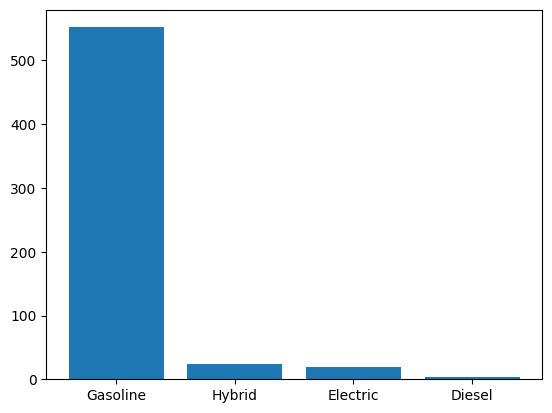

In [191]:
count = cars['Fuel'].value_counts().reset_index()
plt.bar(count['Fuel'], count['count']);

Количество автомобилей на бензине значительно преобладает над остальными.

Задание 8

Посмотрим на соотношение машин с автоматической и механической коробкой передач с помощью круговой диаграммы.

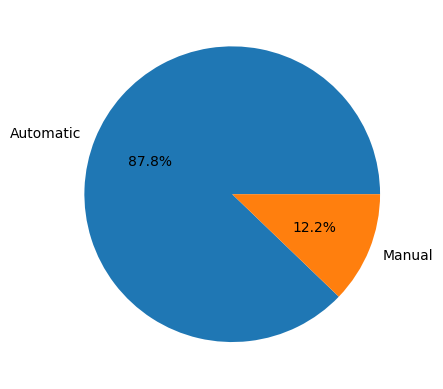

In [192]:
count = cars['Type'].value_counts().reset_index()
plt.pie(count['count'], labels = count['Type'], autopct = "%1.1f%%");

Автомобилей с автоматической коробкой передач больше.

Автомобили с механической коробкой передач составляют примерно 1/8 часть.

Задание 9

Сгруппируем автомобили по типу коробки передач и посмотрим на максимальную и минимальную цену автомобиля в каждой группе.

In [193]:
cars.groupby('Type').agg(min_price = ('Price', 'min'), max_price = ('Price', 'max'))

,min_price,max_price
Type,,
Automatic,257000,9200000
Manual,150000,4700000


Задание 10

Создадим новый столбец Model Group на основе столбца Model.

In [194]:
cars['Model Group'] = cars['Model'].apply(lambda s: s.split()[0])
cars['Model Group'].unique()

array(['Hyundai', 'KIA', 'Nissan', 'Skoda', 'Honda', 'Mercedes', 'Volvo',
       'Peugeot', 'Ford', 'Ssang', 'Chevrolet', 'Volkswagen', 'Audi',
       'Opel', 'Renault', 'Toyota', 'Jeep', 'Chery', 'Mitsubishi', 'BMW',
       'Fiat', 'Seat', 'Daewoo', 'Speranza', 'Mahindra', 'Geely', 'BYD',
       'Mini', 'Haval', 'Zotye', 'Alfa', 'Biac', 'MG', 'Lada', 'Baic',
       'Daihatsu', 'Jetour', 'Land', 'Jac', 'Citroen', 'Subaru', 'Suzuki',
       'Xpeng', 'Hyudai', 'Cupra', 'Tesla'], dtype=object)

Исправим вручную некоторые ошибки, которые получились при создании нового столбца, а также обнаруженные ошибки в данных.

In [195]:
cars.loc[cars['Model Group'] == 'Ssang', 'Model Group'] = 'Ssang Yong'
cars.loc[cars['Model Group'] == 'Land', 'Model Group'] = 'Land Rover'
cars.loc[cars['Model Group'] == 'Alfa', 'Model Group'] = 'Alfa Romeo'
cars.loc[cars['Model Group'] == 'Biac', 'Model Group'] = 'Baic'
cars.loc[cars['Model'] == 'Biac M60', 'Model'] = 'Baic M60'
cars.loc[cars['Model Group'] == 'Hyudai', 'Model Group'] = 'Hyundai'
cars.loc[cars['Model'] == 'Hyudai Accent RB', 'Model'] = 'Hyundai Accent RB'
cars['Model Group'].unique()

array(['Hyundai', 'KIA', 'Nissan', 'Skoda', 'Honda', 'Mercedes', 'Volvo',
       'Peugeot', 'Ford', 'Ssang Yong', 'Chevrolet', 'Volkswagen', 'Audi',
       'Opel', 'Renault', 'Toyota', 'Jeep', 'Chery', 'Mitsubishi', 'BMW',
       'Fiat', 'Seat', 'Daewoo', 'Speranza', 'Mahindra', 'Geely', 'BYD',
       'Mini', 'Haval', 'Zotye', 'Alfa Romeo', 'Baic', 'MG', 'Lada',
       'Daihatsu', 'Jetour', 'Land Rover', 'Jac', 'Citroen', 'Subaru',
       'Suzuki', 'Xpeng', 'Cupra', 'Tesla'], dtype=object)

Создадим новый бинарный признак New, который будет определять, является ли машина новой, на основе числовых признаков.
Будем считать, что машина является новой, если она не старше 2020 года и её пробег меньше 100000

In [196]:
cars['New'] = (cars['Year'] > 2019) & (cars[' Km/h '] < 100000)
cars

,Model,Year,Km/h,Color,Type,Fuel,Price,Model Group,New
0,Hyundai Elantra HD,2009,165000,Gray,Automatic,Gasoline,560000,Hyundai,False
1,Hyundai Elantra,2010,194000,Black,Automatic,Gasoline,600000,Hyundai,False
2,Hyundai Elantra HD,2010,205000,Silver,Automatic,Gasoline,575000,Hyundai,False
3,Hyundai Elantra,2010,160000,Black,Automatic,Gasoline,550000,Hyundai,False
4,Hyundai Elantra,2009,140451,Eggplant,Automatic,Gasoline,650000,Hyundai,False
...,...,...,...,...,...,...,...,...,...
594,KIA Picanto,2015,70000,Silver,Automatic,Gasoline,535000,KIA,False
595,Mitsubishi Lancer EX Shark,2015,120000,Black,Automatic,Gasoline,660000,Mitsubishi,False
596,Ssang Yong Torres,2024,4000,White,Automatic,Gasoline,1900000,Ssang Yong,True
597,KIA Cerato,2011,200000,Red,Automatic,Gasoline,665000,KIA,False


Задание 11

Рассмотрим зависимость числовых признаков между собой при помощи точечной диаграммы.

Начнем с года выпуска и цены автомобиля.

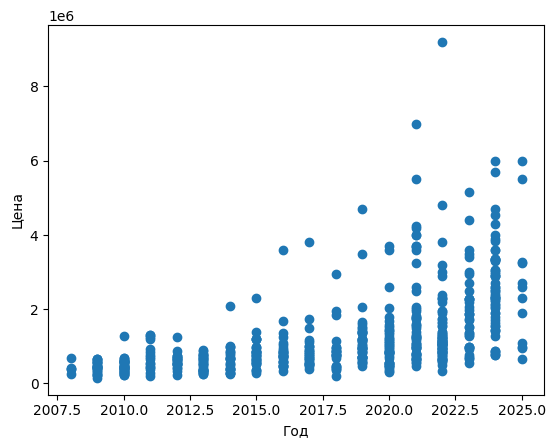

In [197]:
plt.scatter(x = cars['Year'], y = cars['Price'])
plt.xlabel('Год')
plt.ylabel('Цена');

Прослеживается прямая зависимость цены от года, но не сильная, поскольку минимальная цена автомобиля почти не изменилась.

Теперь рассмотрим зависимость цены от пробега.

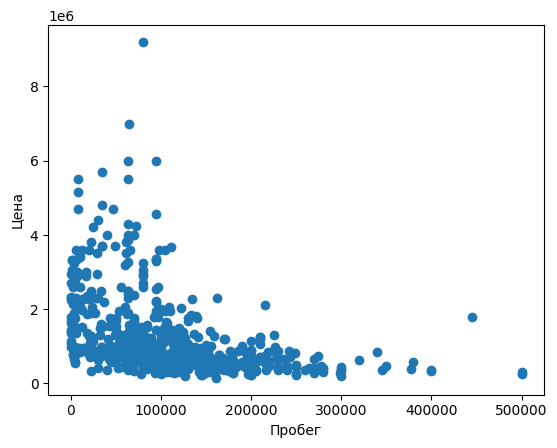

In [198]:
plt.scatter(x = cars[' Km/h '], y = cars['Price'])
plt.xlabel('Пробег')
plt.ylabel('Цена');

Здесь уже обратная зависимость - с увеличением пробега цена снижается, но также не сильная, поскольку есть ценовой сегмент, где цена не зависит от пробега.

Осталось проверить зависимость пробега от года выпуска.

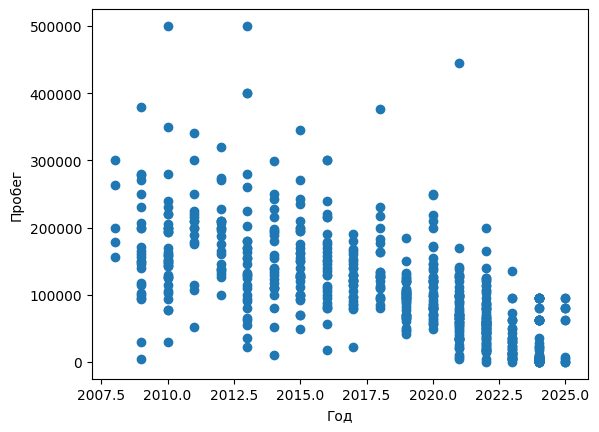

In [199]:
plt.scatter(x = cars['Year'], y = cars[' Km/h '])
plt.xlabel('Год')
plt.ylabel('Пробег');

Здесь также заметна обратная зависимость: более новые автомобили имеют более низкий пробег.

Можно построить тепловую карту по коэффициентам корреляции между признаками и проверить наши наблюдения.

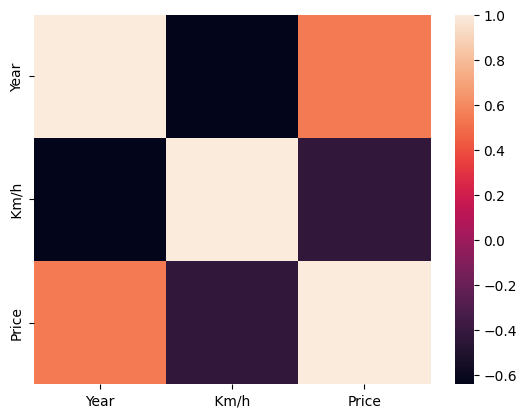

In [200]:
sns.heatmap(cars[['Year', ' Km/h ', 'Price']].corr());

По получившейся тепловой карте мы можем сделать вывод, что наши предположения о зависимости между признаками оказались верными.

Задание 12

Построим диаграмму «Ящик с усами» для каждого числового признака, чтобы определить выбросы.

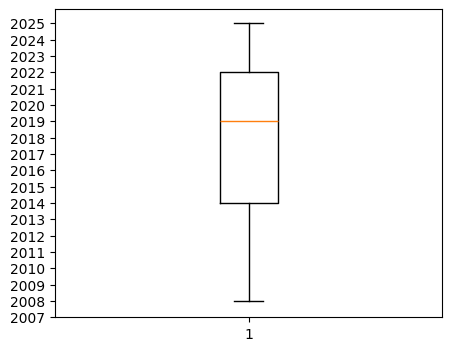

In [201]:
plt.rcParams['figure.figsize'] = 5, 4
plt.boxplot(cars['Year'])
plt.yticks(np.arange(2007, 2026, 1));

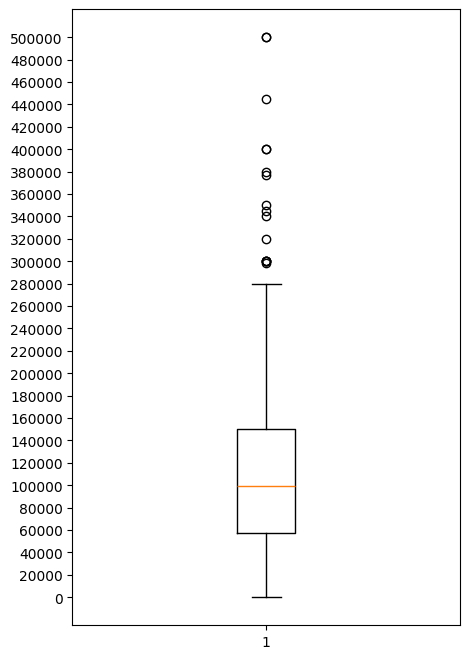

In [202]:
plt.rcParams['figure.figsize'] = 5, 8
plt.boxplot(cars[' Km/h '])
plt.yticks(np.arange(0, 500001, 20000));

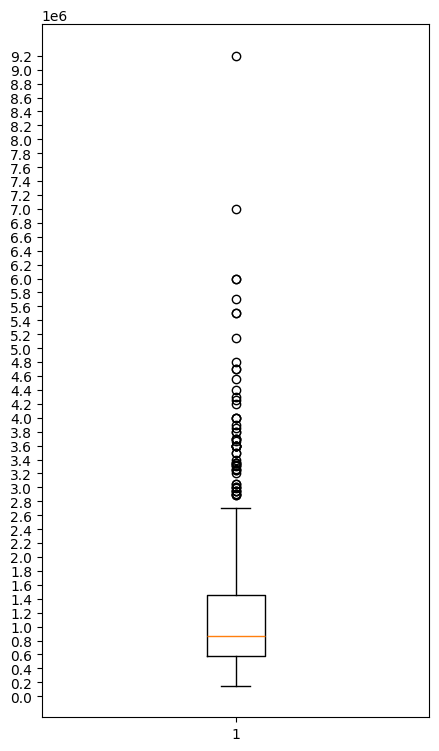

In [203]:
plt.rcParams['figure.figsize'] = 5, 9
plt.boxplot(cars['Price'])
plt.yticks(np.arange(0, 9200001, 200000));

У признака цена очень большое количество выбросов.

Заменим эти выбросы на максимальное значение, не являющееся выбросом.

In [204]:
cars.loc[cars['Price'] > 2700000, 'Price'] = 2700000
cars['Price'].max()

2700000

Задание 13-14

Будем решать задачу регрессии.

Цена автомобиля - целевой признак.

Факторные признаки: год, пробег, тип коробки передач, тип топлива, новизна, группа модели.

Задание 15

Выполним кодирование всех категориальных факторных признаков.

Тип коробки передач и новизна - бинарные признаки.

Тип топлива и группа модели - ранговые признаки.

In [207]:
cars['Type'] = cars['Type'].replace({'Automatic': 1, 'Manual': 0})
cars['Type']

,Type
0,1
1,1
2,1
3,1
4,1
...,...
594,1
595,1
596,1
597,1


In [206]:
dum = pd.get_dummies(cars['Fuel'], dtype = 'int')
cars = pd.concat([cars, dum], axis = 1)
cars.pop('Fuel')
cars

,Model,Year,Km/h,Color,Type,Price,Model Group,New,Diesel,Electric,Gasoline,Hybrid
0,Hyundai Elantra HD,2009,165000,Gray,1,560000,Hyundai,False,0,0,1,0
1,Hyundai Elantra,2010,194000,Black,1,600000,Hyundai,False,0,0,1,0
2,Hyundai Elantra HD,2010,205000,Silver,1,575000,Hyundai,False,0,0,1,0
3,Hyundai Elantra,2010,160000,Black,1,550000,Hyundai,False,0,0,1,0
4,Hyundai Elantra,2009,140451,Eggplant,1,650000,Hyundai,False,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
594,KIA Picanto,2015,70000,Silver,1,535000,KIA,False,0,0,1,0
595,Mitsubishi Lancer EX Shark,2015,120000,Black,1,660000,Mitsubishi,False,0,0,1,0
596,Ssang Yong Torres,2024,4000,White,1,1900000,Ssang Yong,True,0,0,1,0
597,KIA Cerato,2011,200000,Red,1,665000,KIA,False,0,0,1,0


In [208]:
cars['New'] = cars['New'].astype(int)
cars['New']

,New
0,0
1,0
2,0
3,0
4,0
...,...
594,0
595,0
596,1
597,0


In [209]:
dum = pd.get_dummies(cars['Model Group'], dtype = 'int')
cars = pd.concat([cars, dum], axis = 1)
cars.pop('Model Group')
cars

,Model,Year,Km/h,Color,Type,Price,New,Diesel,Electric,Gasoline,...,Speranza,Ssang Yong,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,Xpeng,Zotye
0,Hyundai Elantra HD,2009,165000,Gray,1,560000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Hyundai Elantra,2010,194000,Black,1,600000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Hyundai Elantra HD,2010,205000,Silver,1,575000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai Elantra,2010,160000,Black,1,550000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Hyundai Elantra,2009,140451,Eggplant,1,650000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,KIA Picanto,2015,70000,Silver,1,535000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
595,Mitsubishi Lancer EX Shark,2015,120000,Black,1,660000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
596,Ssang Yong Torres,2024,4000,White,1,1900000,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
597,KIA Cerato,2011,200000,Red,1,665000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Задание 16

Выполним нормализацию данных.

In [210]:
sc = MinMaxScaler()
ncars = cars[['Year', ' Km/h ', 'Price']]
ncars = pd.DataFrame(sc.fit_transform(ncars), columns = ncars.columns)
cars.pop('Year')
cars.pop(' Km/h ')
cars.pop('Price')
cars = pd.concat([ncars, cars], axis = 1)
cars

,Year,Km/h,Price,Model,Color,Type,New,Diesel,Electric,Gasoline,...,Speranza,Ssang Yong,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,Xpeng,Zotye
0,0.058824,0.329999,0.160784,Hyundai Elantra HD,Gray,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.117647,0.387999,0.176471,Hyundai Elantra,Black,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.117647,0.409999,0.166667,Hyundai Elantra HD,Silver,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.117647,0.319999,0.156863,Hyundai Elantra,Black,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.058824,0.280901,0.196078,Hyundai Elantra,Eggplant,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.411765,0.139998,0.150980,KIA Picanto,Silver,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
595,0.411765,0.239998,0.200000,Mitsubishi Lancer EX Shark,Black,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
596,0.941176,0.007998,0.686275,Ssang Yong Torres,White,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
597,0.176471,0.399999,0.201961,KIA Cerato,Red,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Задание 17

Выполним разбиение датасета на обучающую и тестовую выборки.

In [211]:
x = cars.drop(['Model', 'Color', 'Price'], axis = 1)
y = cars['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Задание 18

Возьмём линейную и гребнеую модель регрессии.

Обучим наши модели и получим прогнозные значения.

In [212]:
model1 = LinearRegression()
model1.fit(x_train, y_train)
y1_model = model1.predict(x_train)
y1_pred = model1.predict(x_test)

model2 = Ridge()
model2.fit(x_train, y_train)
y2_model = model2.predict(x_train)
y2_pred = model2.predict(x_test)

Задание 19

Посчитаем показатели качества для обоих моделей.

In [213]:
print("Линейная регрессия")
print("\nОбучающая выборка:")
print('R2 =', r2_score(y_train, y1_model))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y1_model)))
print("\nТестовая выборка:")
print('R2 =', r2_score(y_test, y1_pred))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y1_pred)))
print("\n\nГребневая регрессия")
print("\nОбучающая выборка:")
print('R2 =', r2_score(y_train, y2_model))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y2_model)))
print("\nТестовая выборка:")
print('R2 =', r2_score(y_test, y2_pred))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y2_pred)))

Линейная регрессия

Обучающая выборка:
R2 = 0.8216152873462274
RMSE = 0.12207474984317923

Тестовая выборка:
R2 = 0.7645372187091899
RMSE = 0.14481310344288043


Гребневая регрессия

Обучающая выборка:
R2 = 0.8125670680503821
RMSE = 0.1251324580657859

Тестовая выборка:
R2 = 0.7522890186672575
RMSE = 0.14853176984814725


Вывод: У обоих моделей доcаточно низкий показатель RMSE, а показатель R2 гораздо лучше на обучающей выборке, чем на тестовой. Линейная модель показала результаты лучше, чем гребневая.

Скорее всего это связано с тем, что количество данных небольшое, поэтому модель обучилась недостаточно хорошо.

Интересное наблюдение: столбец Model Group очень сильно повлиял на показатель R2, до его добавления показатель был в два раза хуже.